# Crop Yield Prediction model 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#read the dataset to a dataframe
yield_df = pd.read_csv('yield_df.csv', sep = ',')

In [3]:
# Shapes of the dataset
yield_df.shape

(28242, 8)

In [4]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [5]:
yield_df.drop('Unnamed: 0', axis = 1,inplace = True)

In [6]:
yield_df.rename(columns = {'hg/ha_yield' :'hg_ha_yield'}, inplace = True)

In [7]:
yield_df.head()

,Area,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
# Check for duplicates
yield_df.duplicated().sum()

2310

In [9]:
# Drop duplicates
yield_df.drop_duplicates(inplace = True)

In [10]:
# Check for duplicates again
yield_df.duplicated().sum()

0

In [11]:
# check the new shape of dataset
yield_df.shape

(25932, 7)

## Exploration and Visualisation

In [12]:
corr_data = yield_df.select_dtypes(include = ['int','float']).corr()

<AxesSubplot:>

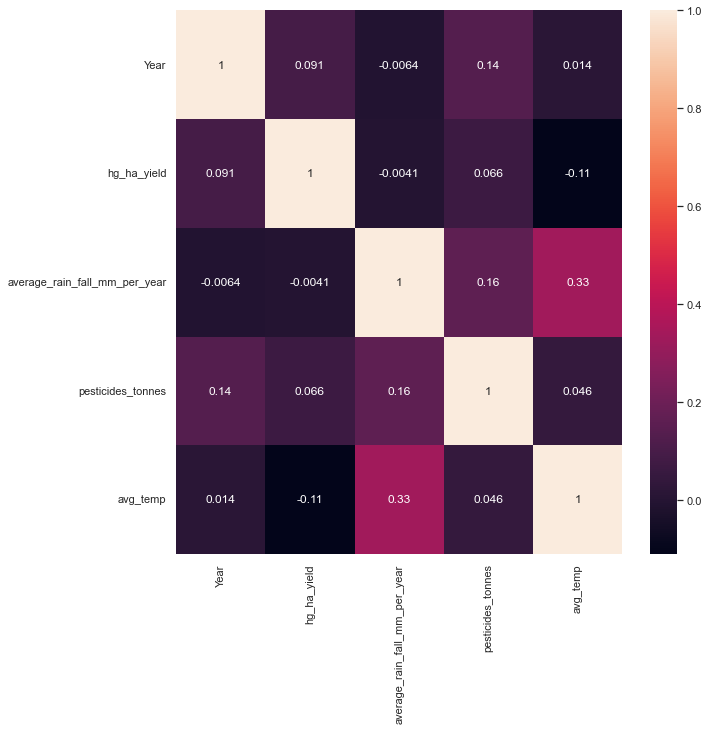

In [13]:
plt.figure(figsize = (10,10))
sns.set_theme(style = 'white', palette = 'plasma')
sns.heatmap(corr_data, annot = True)

From this heatmap, it is observed that there isn't high correlation between the yield and other numerical features in the dataset. This means a factor that strongly determines the yield of crops may not be gotten.

In [14]:
yield_df['Item'].value_counts()

Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: Item, dtype: int64

Potatoes are the most grown crops

In [15]:
yield_df['Area'].nunique()

101

There are 101 areas so let us look for the top 10 areas with the highest yield

#### Getting the 10 areas with the highest yield

In [16]:
yield_df.groupby(['Area'], sort = True)['hg_ha_yield'].sum().nlargest(10)

Area
India             274219558
Brazil            136340329
Mexico            113698872
Australia         109111062
Japan             100924145
Indonesia          68067328
Turkey             52263950
Pakistan           49264956
Spain              46773540
United Kingdom     44335992
Name: hg_ha_yield, dtype: int64

From this dataset, India is the country with the highest yield in 2012

#### Groupby Area and Item to see the country with the highest yield and the items they produce

In [17]:
yield_df.groupby(['Area', 'Item'], sort = True)['hg_ha_yield'].sum().nlargest(10)

Area            Item          
India           Cassava           119691113
                Potatoes           77126500
Australia       Potatoes           45670386
Brazil          Potatoes           40335293
United Kingdom  Potatoes           37364116
India           Sweet potatoes     37169811
Mexico          Potatoes           36559587
Australia       Sweet potatoes     35550294
Japan           Potatoes           34829648
Mexico          Sweet potatoes     31148282
Name: hg_ha_yield, dtype: int64

India has the highest production of cassava and potatoes. Potatoes are also the dominant item with the highest yield in at least 4 countries.

In [18]:
yield_df.groupby(['Area', 'Item', 'Year'], sort = True)['hg_ha_yield'].sum().nlargest(10)

Area   Item     Year
India  Cassava  2012    7330542
                2011    6930630
                2013    6642286
                2010    6603545
                2008    6372733
                2007    6121876
                2009    5838361
                2005    5794582
                2006    5780376
                2002    5182174
Name: hg_ha_yield, dtype: int64

2012 had the highest yield of Cassava crops in India

In [19]:
yield_df.groupby(['Area'], sort = True)['pesticides_tonnes'].sum().nlargest(10)

Area
Brazil       3.504581e+08
India        1.637140e+08
Mexico       5.573091e+07
Japan        5.512744e+07
Australia    3.198921e+07
Italy        2.581664e+07
Argentina    2.499804e+07
Canada       2.379243e+07
Colombia     2.193277e+07
Turkey       2.081824e+07
Name: pesticides_tonnes, dtype: float64

Higher tonnes of pesticides were used in Brazil followed by India

In [20]:
yield_df.groupby(['Area'], sort = True)['average_rain_fall_mm_per_year'].sum().nlargest(10)

Area
India                 3664872.0
Brazil                3264894.0
Indonesia             2204832.0
Ecuador               1412154.0
Colombia              1341360.0
Japan                 1307712.0
Mexico                 970240.0
Dominican Republic     518880.0
Australia              515844.0
Papua New Guinea       505862.0
Name: average_rain_fall_mm_per_year, dtype: float64

India had the highest rainfall

In [21]:
yield_df.groupby(['Area'], sort = True)['avg_temp'].sum().nlargest(10)

Area
India                 88166.48
Brazil                43366.59
Mexico                26007.44
Pakistan              23852.15
Indonesia             21970.50
Australia             16029.51
Ecuador               12732.93
Japan                 11971.26
Colombia              10321.56
Dominican Republic     9848.80
Name: avg_temp, dtype: float64

In [22]:
yield_df.columns

Index(['Area', 'Item', 'Year', 'hg_ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

## Data Preprocessing
> Here,  we then define the preprocessing steps for each data type using Pipeline. We define a numeric transformer that scales the numeric column using StandardScaler, and a categorical transformer that one-hot encodes the categorical column using OneHotEncoder. We then define a ColumnTransformer that applies the preprocessing steps to the relevant columns.

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [47]:
# Select features and label for model
features = yield_df.drop(['hg_ha_yield', 'Year'], axis = 1)
label = yield_df['hg_ha_yield']

In [48]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [64]:
# Define preprocessing steps for numerical and categorical variables
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, ['average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp']),
                                               ('cat', cat_transformer, ['Area', 'Item'])])

## Model Selection and Comparison
> We then define a separate pipeline for each model we want to test, with the preprocessor defined as the first step in each pipeline.
> Finally, we fit and evaluate each pipeline using the fit and various metric methods such as r2_score, mean_absolute_error and mean_square_error of each pipeline. 

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [67]:
models = {
    'Decision Tree Regressor': Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Decision Tree Regressor', DecisionTreeRegressor())
]),
    'Random Forest Regressor': Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=200))
]),
    'Gradient Boosting Regressor':Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=200))
]) ,
    'Support Vector Regressor':Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Support Vector Regressor',SVR())]),
}


# train and evaluate models
for name, model in models.items():
    # train model on training set
    model.fit(x_train, y_train)
    # make predictions on testing set
    y_pred = model.predict(x_test)
    # calculate R2 score
    r2 = r2_score(y_test, y_pred)
    # calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # print result
    print(f"{name} R2 score: {r2}\t")
    print(f"{name} MAE score: {mae}\t")
    print(f"{name} MSE score: {mse}\n")

Decision Tree Regressor R2 score: 0.9513115346638075	
Decision Tree Regressor MAE score: 6872.224632093053	
Decision Tree Regressor MSE score: 352888691.73834693

Random Forest Regressor R2 score: 0.9661586387506286	
Random Forest Regressor MAE score: 6333.822345705917	
Random Forest Regressor MSE score: 245278499.0341074

Gradient Boosting Regressor R2 score: 0.8860584064069739	
Gradient Boosting Regressor MAE score: 18393.47834183164	
Gradient Boosting Regressor MSE score: 825836255.4659593

Support Vector Regressor R2 score: -0.20892902000684854	
Support Vector Regressor MAE score: 57922.34364257103	
Support Vector Regressor MSE score: 8762185814.01071



## Conclusion
>The chosen evaluation metric is the R-squared (R2) regression score function, which quantifies the proportion of variance in the regression model's items (such as crops). The score indicates the goodness of fit of the regression line or curve to the terms (data points) in the model. 

>The R2 score ranges from 0 to 1, where a score of 1 represents a perfect prediction, and a score of 0 indicates no prediction ability. Based on the evaluation results, the Random Forest Regressor has the highest R2 score of 97%, followed by the Decision Tree Regressor at 95%.